In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-22-complete-player-dataset/female_players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_20.csv
/kaggle/input/fifa-22-complete-player-dataset/players_15.csv
/kaggle/input/fifa-22-complete-player-dataset/players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/Career Mode female player datasets - FIFA 16-22.xlsx
/kaggle/input/fifa-22-complete-player-dataset/players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_21.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_21.cs

In [5]:
players = pd.read_csv('/kaggle/input/fifa-22-complete-player-dataset/players_22.csv',low_memory=False)
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [6]:
features=["overall","potential","wage_eur","value_eur","age"]

In [7]:
players=players.dropna(subset=features)

In [8]:
players[features].isnull().sum()

overall      0
potential    0
wage_eur     0
value_eur    0
age          0
dtype: int64

In [9]:
data=players[features].copy()

In [10]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [11]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,1.916500e+04,19165.000000
mean,65.760188,71.079990,9021.721889,2.850452e+06,25.190034
std,6.882803,6.087721,19476.005074,7.613700e+06,4.727515
min,47.000000,49.000000,500.000000,9.000000e+03,16.000000
25%,61.000000,67.000000,1000.000000,4.750000e+05,21.000000
50%,66.000000,71.000000,3000.000000,9.750000e+05,25.000000
75%,70.000000,75.000000,8000.000000,2.000000e+06,29.000000
max,93.000000,95.000000,350000.000000,1.940000e+08,43.000000


In [12]:
data=(data-data.min())/(data.max()-data.min())

In [13]:
data=data*9+1

In [14]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [15]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [45]:
def random_cent(data,k):
    centroids=[]
    for i in range(k):
    
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

        

In [46]:
centroids=random_cent(data,5)

<ipython-input-45-52cccbd7744c>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=data.apply(lambda x: float(x.sample()))


In [47]:
centroids

,0,1,2,3,4
overall,3.934783,8.630435,6.282609,4.913043,4.521739
potential,5.304348,6.282609,6.086957,5.304348,5.695652
wage_eur,1.090129,1.038627,1.450644,1.000000,1.012876
value_eur,1.028579,1.015820,1.023939,1.005150,1.120207
age,4.666667,1.666667,3.000000,4.000000,4.333333


In [20]:

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [21]:
labels = get_labels(data, centroids)

In [35]:

labels.value_counts()

3    8763
1    6296
2    2413
4     868
0     825
Name: count, dtype: int64

In [39]:

def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [41]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

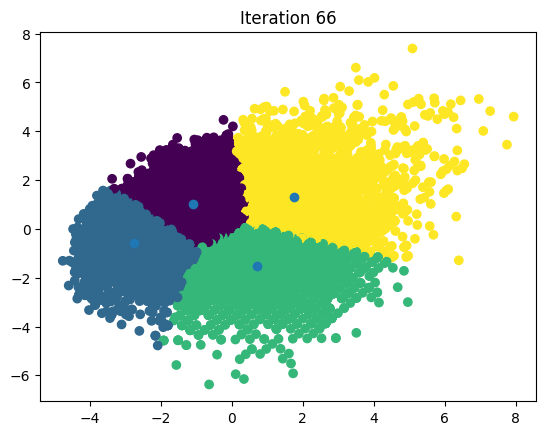

In [49]:
max_iterations = 100
centroid_count = 4

centroids = random_cent(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [50]:
 centroids 

,0,1,2,3
overall,4.311694,2.583541,4.642364,6.405155
potential,5.838660,4.283190,4.369041,6.512406
wage_eur,1.074427,1.017366,1.088135,1.614006
value_eur,1.062916,1.013460,1.035494,1.369797
age,2.700703,2.483590,5.435779,4.445231


In [51]:
labels.value_counts()

2    6345
0    5675
3    4198
1    2947
Name: count, dtype: int64

In [52]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
2415,A. Aouchiche,74,82,9000.0,9000000.0,18
2866,Osvaldão Murilo,73,73,9000.0,3100000.0,21
2871,Nicolás Formido,73,73,16000.0,3600000.0,21
2877,Neviano Neves,73,73,17000.0,3600000.0,21
2884,Luis Couprins,73,73,9000.0,3200000.0,21
...,...,...,...,...,...,...
18124,M. Løvik,55,76,500.0,375000.0,17
18125,J. Hernández,55,77,500.0,400000.0,17
18227,K. Urbański,54,79,550.0,350000.0,16
18311,S. Denham,54,77,500.0,325000.0,18


## Using Sklearn

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
kmeans.fit(data)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [61]:
kmeans.cluster_centers_

array([[4.22085315, 4.19298887, 1.05614479, 1.03138807, 4.69156577],
       [5.6001258 , 5.2255512 , 1.26699858, 1.08881504, 6.18117627],
       [6.10023292, 6.72082298, 1.63583507, 1.43290815, 3.72031746],
       [3.47891084, 5.31582718, 1.03664716, 1.0339937 , 2.48502384]])

In [65]:
pd.DataFrame(kmeans.cluster_centers_, columns=features)

,overall,potential,wage_eur,value_eur,age
0,4.220853,4.192989,1.056145,1.031388,4.691566
1,5.600126,5.225551,1.266999,1.088815,6.181176
2,6.100233,6.720823,1.635835,1.432908,3.720317
3,3.478911,5.315827,1.036647,1.033994,2.485024


In [64]:

centroids

,0,1,2,3
overall,4.311694,2.583541,4.642364,6.405155
potential,5.838660,4.283190,4.369041,6.512406
wage_eur,1.074427,1.017366,1.088135,1.614006
value_eur,1.062916,1.013460,1.035494,1.369797
age,2.700703,2.483590,5.435779,4.445231
